<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.  

Источник данных: Яндекс.Практикум

## Загрузка данных

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [54]:
data = pd.read_csv('/datasets/insurance.csv')

In [55]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


**Описание данных**  
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.  
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


In [58]:
def info_df(df):
    print('Размер датасета -', df.shape)
    print('Количество дубликатов -', df.duplicated().sum())
    print('Количество пропущенных значений:', data.isna().sum().sum())

In [59]:
info_df(data)

Размер датасета - (5000, 5)
Количество дубликатов - 153
Количество пропущенных значений: 0


In [60]:
# тепловая карта корреляции

def heatmap_b(df, title_1='Корреляция признаков'):
    plt.figure(figsize=(15, 3))

    matrix = np.triu(df.corr())
    
    heatmap_b = sns.heatmap((df.corr()), 
        vmin=-1, 
        vmax=1, 
        cmap="YlGnBu", 
        annot=True, 
        fmt='.2g', mask=matrix, annot_kws={'fontsize':16})


    heatmap_b.set_title(title_1, fontdict={'fontsize':16})

    return heatmap_b

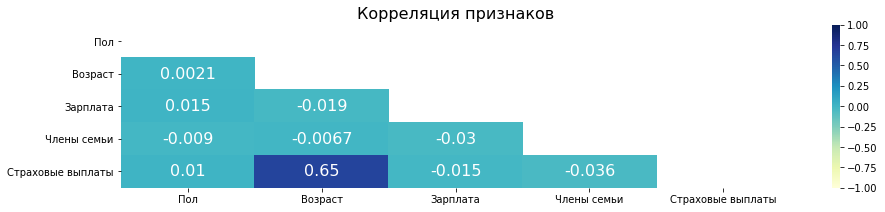

In [61]:
heatmap_b(data)
plt.show()

Рассмотрим уникальные значения признаков в датасете

**Вывод**
***
- Исходный датасет содержит 5000 строк и 5 столбцов.
- Целевой признак - страховые выплаты - минимальное значение признака - 0, максимальное - 5. Медиана - 0, среднее - 0.14, так же до 75 квантиля страховые выплаты равны 0, что говорит о том, что чаще выплат нет.   
- Наиольший коэффициент корреляции наблюдается у целевого признака с признаком возраста клиента - 0.65. Для остальных признаков коэффициент корреляции мал - около 0.
- В датасете имеется 153 дубликата, но так как информация обезличена - нет уникального идентификатора, то не представляется возможным узнать, действительно ли эти дубликаты относятся к одному клиенту.  
- Пропущенные значения в датасете отсутствуют.
- Типы данных в датасете - int, float, что удовлетворяет условиям обучения модели и преобразованию признаков.  

## Умножение матриц

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**  

a. Изменится. Приведите примеры матриц.  
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Проверим, как теоретически повляет и повлият ли вообще преобразование признаков на качество модели линейной регрессии.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Свойства матриц:  

- порядок раскрытия скобок
$$
(AB)^{-1} = B^{-1} A^{-1}
$$

$$
(AB)^T = B^T A^T
$$
- порядок перемножения нескольких матриц
$$
ABС = (AB)C = A(BC)
$$

$$
EA = AE = A
$$

- умножение матрицы на обратную (для квадратной) $$ AA^{-1} = E
$$



Обозначим обратимую матрицу S c размером (n, n): на нее должна быть умножена матрица признаков X с размером (m, n).  
То есть, вместо матрицы X будет использоваться XS. Подставим в формулу обучения новую матрицу.

$$
w_s = ((X S)^T (X S))^{-1} (X S)^T y
$$  


Раскроем скобки в соответствии со свойствами матриц:  

$$
w_s = ((S^T X^T X) S)^{-1} (X S)^T y 
$$

$$
w_s = S^{-1} (S^T (X^T X))^{-1} (X S)^T y 
$$

$$
w_s = S^{-1} (X^T X)^{-1} (S^T)^{-1} S^T X^T  y 
$$

$$
w_s = S^{-1} (X^T X)^{-1} E X^T  y = S^{-1} (X^T X)^{-1} X^T  y 
$$

Подставим в формулу предсказания полученный вектор w
$$
a_s = X S S^{-1} (X^T X)^{-1} X^T  y
$$

$$
a_s = X E (X^T X)^{-1} X^T y
$$

$$
a_s = X (X^T X)^{-1} X^T y
$$

Исходный ветор $w = (X^T X)^{-1} X^T y $

Подставим вместо выражения вектор $w$ в $a_s$ 
$$
a_s = Xw = a
$$

**Ответ:** 
<table> 
    <tr>
        <td bgcolor= #F0FFF0>
            <b> 
                <p align="right">
                    <big>
                        Преобразование признаков путем их умножения на обратимую матрицу не повлияет на качество предсказаний модели линейной регрессии.
</big></p></b></tr></table>  
    
**Обоснование:** 
В исходную формулу обучения и предсказания модели линейной регрессии была подставлена преобразованная матрица XS, где S - квадратная обратимая матрица, X - матрица исходных признаков. Путем преобразования формулы с помощью свойств матриц была получена следующая формула предсказаний на новой матрице: 
$$
a_s = X (X^T X)^{-1} X^T y
$$  

Часть выражения $ (X^T X)^{-1} X^T y $ равна исходному значению форулы обучения w. Следовательно, при подставновке $w$ в $a_s$ получаем: 
$$
a_s = Xw = a
$$
Следовательно, умножение матрицы признаков X на обратимую квадратную матрицу S не повлиет на значения предсказания модели.

Рассмотрим пример.

Функция random_matrix(features, s=5):
На вход подаются признаки и фиксирующее значение.  
Возвращает:
- преобразованный набор признаков (матрица признаков умножается на случайную квадратную матрицу)  
- возобновляемую квадратную обратимую матрицу, размера по длине признаков   

Обратимость матрицы проверяется нахождением определителя матрицы - которые не должен быть равен 0 в случае с обратимой матрицей.   
В случае, если матрица не обратима, фунция возвращает ошибку - "Матрица не обратима".

In [62]:
def random_matrix(features, s=5):
    # функция возвращает обратимую квадртаную матрицу по длине признаков и преобраованные признаки
    np.random.seed(s)
    S = np.random.normal(0, 1, size=(features.shape[1], features.shape[1]))
    try: 
        det_s = np.linalg.det(S)
        if det_s != 0:
            return features @ S, S
    except:
        return print('Матрица не обратимая')

Из исходного датасета выделим часть признаков для построения матрицы P размера (m, n).

In [63]:
np.random.seed(5)
P = np.array(data.sample(17))
print('Размер матрицы', P.shape)
P

Размер матрицы (17, 5)


array([[1.00e+00, 3.00e+01, 3.48e+04, 1.00e+00, 0.00e+00],
       [0.00e+00, 4.80e+01, 5.12e+04, 1.00e+00, 1.00e+00],
       [0.00e+00, 2.80e+01, 4.11e+04, 4.00e+00, 0.00e+00],
       [1.00e+00, 3.60e+01, 2.23e+04, 2.00e+00, 0.00e+00],
       [1.00e+00, 4.10e+01, 3.09e+04, 3.00e+00, 0.00e+00],
       [1.00e+00, 3.00e+01, 4.03e+04, 0.00e+00, 0.00e+00],
       [1.00e+00, 4.00e+01, 5.52e+04, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.90e+01, 5.99e+04, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.90e+01, 1.87e+04, 2.00e+00, 0.00e+00],
       [0.00e+00, 4.00e+01, 3.47e+04, 2.00e+00, 0.00e+00],
       [1.00e+00, 3.90e+01, 6.15e+04, 2.00e+00, 0.00e+00],
       [0.00e+00, 2.40e+01, 5.62e+04, 0.00e+00, 0.00e+00],
       [0.00e+00, 4.00e+01, 3.09e+04, 0.00e+00, 0.00e+00],
       [0.00e+00, 3.70e+01, 4.32e+04, 2.00e+00, 0.00e+00],
       [0.00e+00, 2.80e+01, 3.51e+04, 0.00e+00, 0.00e+00],
       [1.00e+00, 3.30e+01, 4.36e+04, 2.00e+00, 0.00e+00],
       [0.00e+00, 2.70e+01, 2.54e+04, 2.00e+00, 0.00e+00

Построим рандомную матрицу S размера (n, n) c помощью функции random_matrix.

In [64]:
new_P, S = random_matrix(P, s=6)

print('Размер преобразованных признаков', new_P.shape)
print('Размер признаков до преобразования', P.shape)
print('Преобразованные признаки')
print(new_P)
print()
print('Обратимая квадратная матрица')
print(S)

Размер преобразованных признаков (17, 5)
Размер признаков до преобразования (17, 5)
Преобразованные признаки
[[ 91595.77830599  20978.03134178 -11734.04030422  43122.19081029
    3852.68726977]
 [134765.88456478  30869.28697451 -17271.32676398  63451.03413851
    5670.7625544 ]
 [108171.71855113  24766.75676796 -13847.74949716  50919.46240827
    4558.57325327]
 [ 58710.38000057  13462.0917273   -7544.75980497  27660.93774181
    2461.81647856]
 [ 81344.08820189  18643.47452316 -10441.06728778  38314.31387431
    3416.17989975]
 [106067.6922197   24287.97758892 -13581.23405824  49929.11472269
    4463.08153199]
 [145283.03418939  33266.47587814 -18601.16618133  68388.43572292
    6115.4029358 ]
 [157649.01040576  36093.83726159 -20178.14055017  74203.53006965
    6637.3245582 ]
 [ 49222.24471856  11276.37154412  -6309.84640629  23177.21355779
    2069.06326945]
 [ 91342.2237004   20928.46687773 -11715.96602396  43016.34325393
    3840.57295272]
 [161859.31759988  37056.90511675 -20715.

Найдем обратную для S матрицу.

In [65]:
print('Обратная матрица S') 
print(np.linalg.inv(S))

Обратная матрица S
[[-0.25180348 -0.08018932  0.41645152 -0.92464035  0.05169677]
 [ 0.93137811 -0.38415783  0.08963977  2.34856428  0.28757422]
 [ 0.96978616 -0.73599284  0.25626738  2.68187393 -0.1301227 ]
 [ 0.35837249  0.17832142 -0.05284485  1.5071183  -0.30076551]
 [-0.14214509 -0.2315012   0.01561766  0.49442661  0.17516499]]


Вернем преобразованную матрицу к исходной путем умножения на обратную матрицу S.
Так как при преобразовании матриц появляется различная точность в числах с плавающей точкой, проверим равенство исходной и преобразованной матриц с помощью np.allclose(), которая сравнивает значения в пределах допуска.
- X- исходная матрица признаков
- S - матрица преобразователь
- new - преобразованая матрица признаков

In [66]:
def check_matrix(X, S, new):
    if np.allclose(X, (new @ np.linalg.inv(S))) == True:
        return print('Матрица возвращена к исходной')
    else:
        return print('Ошибка')

In [67]:
check_matrix(P, S, new_P,)

Матрица возвращена к исходной


**Вывод**
***
При умножении признаков на обратимую матрицу качество предсказаний линейной регрессии не изменится.  
Признаки с помощью обратной матрицы возможно вернуть к исходному состоянию.

## Алгоритм преобразования

**Алгоритм**

Признаки размера (m, n) необходимо умножить на квадратную матрицу размера (n, n), при этом матрица 2 должна быть обратима.  

- разделить датасет на признаки и целевой признак  
- разделить выборку на обучающую и валидационную  
- обучить модель линейной регрессии на исходных данных, проверить качество предсказаний метрикой r2
- создать обратимую матрицу S с помощью np.random.normal()  
- зашифровать признаки с помощью матрицы S путем умножения признаков на S  
- обучить новую модель линейной регрессии уже на зашифрованных признаках, проверить качество предсказаний метрикой r2 
- сравнить метрики до и после шифрования данных, проверить как изменилось качество предсказания  
- дешифровать признаки и сравнить с матрицей исходных признаков

**Обоснование**  
С помощью данного алгоритма возможно проверить работу модели для данных как в исходном состоянии, так и в преобразованном виде. 

Построим функцию для обучения модели линейной регресии LinearRegresssion_df:
Функция возвращает метрику R2 и выводит ее на экран.  
Функция делит датасет на обучающую и валидационную выборки, строит и обучает модель линейной регрессии на обучающей выборке, делает предсказания на валидацтонной.  
Метрика R2 считается на валидационной выборке.  
Так же, функция выводит на экран размеры выборок после разделения.

In [68]:
def LinearRegresssion_df(features, target):
    
    # разделение на выборки обуч. 75% и вал. 25%
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=.25, random_state=5)
    # проверка размера выборок 
    print('Размер тренировочной выборки признаков:', features_train.shape, 
          'целевого признака:', target_train.shape, sep='\n')
    print('Размер валидационной выборки признаков:', features_valid.shape, 
          'целевого признака:', target_valid.shape, sep='\n')
    print()
    
    model = LinearRegression() # модель

    model.fit(features_train, target_train) # обучение

    predictions = model.predict(features_valid) # предсказания

    r2_score_m = r2_score(target_valid, predictions) # R2

    print('R2 модели: {:.5f}'.format(r2_score_m))
    
    return r2_score_m

In [69]:
def shape_df(df, f, t):
    print('Размер исходного датасета', df.shape)
    print('Размер признаков', f.shape)
    print('Размер целевого признака', t.shape)

**Вывод**
***
Проверим далее работу линейной регрессии на исходных данных и на преобразованных.

## Проверка алгоритма

Разделим датасет на признаки и целевой признак, проверим размеры данных до разделения и после.

In [70]:
data.head(2)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1


In [71]:
features_1 = data.drop('Страховые выплаты', axis=1)
target_1 = data['Страховые выплаты']

In [72]:
shape_df(data, features_1, target_1)

Размер исходного датасета (5000, 5)
Размер признаков (5000, 4)
Размер целевого признака (5000,)


С помощью функции LinearRegresssion_df обучим модель линейной регрессии и проверим ее качетсво метрикой R2.

In [73]:
r2_1 = LinearRegresssion_df(features_1, target_1)

Размер тренировочной выборки признаков:
(3750, 4)
целевого признака:
(3750,)
Размер валидационной выборки признаков:
(1250, 4)
целевого признака:
(1250,)

R2 модели: 0.42937


Следующим шагом необходимо преобразовать исходные признаки. Для этого, вызовем ранее примененную функцию random_matrix на признаках, которая вернет преобразованные признаки и обратимую матрицу, с помощью которой эти преобразования были сделаны (умножение признаков на обратимую матрицу).

new_feautures - матрица с преобразованными признаками,  
S_after  - обратимая матрица, с помощью которой признаки преобразовались.

In [74]:
new_feautures, S_after = random_matrix(features_1)
print('Размер признаков после преобразования', new_feautures.shape)
new_feautures.head()

Размер признаков после преобразования (5000, 4)


,0,1,2,3
0,9309.696404,-16296.395579,-59197.637322,-10187.084299
1,7133.605806,-12461.660793,-45368.544751,-7813.222868
2,3942.846428,-6881.377161,-25074.424601,-4319.564185
3,7824.638666,-13721.138193,-49760.707796,-8557.175219
4,4899.954497,-8565.627297,-31154.184120,-5364.094845


Размер матрицы признаков остался неизменным - 5000 строк и 4 столбца, при этом данные изменились.  

Проверим работу модели на измененных признаках.

In [75]:
r2_2 = LinearRegresssion_df(new_feautures, target_1)

Размер тренировочной выборки признаков:
(3750, 4)
целевого признака:
(3750,)
Размер валидационной выборки признаков:
(1250, 4)
целевого признака:
(1250,)

R2 модели: 0.42937


In [76]:
pd.DataFrame({'R2_score': [r2_1, r2_2]}, index=['до преобразования', 'после преобразования'])

,R2_score
до преобразования,0.429374
после преобразования,0.429374


Метрика R2 одинакова для исходных данных и для преобразованных.  

Вернемся к исходным признакам умножив преобразованную матрицу на обратную.

In [77]:
check_matrix(np.array(features_1), S_after, new_feautures)

Матрица возвращена к исходной


In [78]:
start_df = new_feautures @ np.linalg.inv(S_after)
start_df.shape

(5000, 4)

**Вывод**
***
Метрика R2 осталась неизменной для исходных данных и для преобраованных и составила 0.43 для модели линейной регрессии без учета гиперпараметров.

## Общий вывод

Исходные данные пользователей содержат 5000 строк и 5 столбцов, целевой признак для модели линейной регрессии - количество страховых выплат.  

Данные пользователей возможно преобразовать путем умножения матрицы признаков (m, n) на обратимую матрицу размера (n, n).   

В этом случае качетсво предсказаний линейной регрессии останется неизменным:

- **модель линейной регрессии показала одинаковое качество предсказаний** как на исходных данных, так и на преобразованных, метрика R2 составила 0,43.

После преобразования данные возможно вернуть в исходное состояние (с учетом допуска преобразования) умножив преобразованные данные на обратную матрицу-преобразователь.